In [21]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Create synthetic dataset
Dataset contains data with labels y = 1 sampled from a Gaussian with mean (2, 1) and covariance as the indentity matrix. Data with labels y = 0 is sampled from a Gaussian with mean = (3, 3) and covariance as the identity matrix

In [74]:
np.random.seed(1024)
num_samples = 250

mean_y1 = (-4, -4)
mean_y0 = (0, 0)
covar = [[1, 0], [0, 1]]

x1 = np.random.multivariate_normal(mean_y1, covar, (num_samples))
x0 = np.random.multivariate_normal(mean_y0, covar, (num_samples))
y1 = np.ones([num_samples])
y0 = np.zeros([num_samples])

X_train = np.concatenate([x1, x0], axis=0)
y_train = np.concatenate([y1, y0], axis=0)

## Visualize synthetic dataset

Visualization code credits to https://github.com/upul/Machine-Learning-Algorithms-From-Scratch

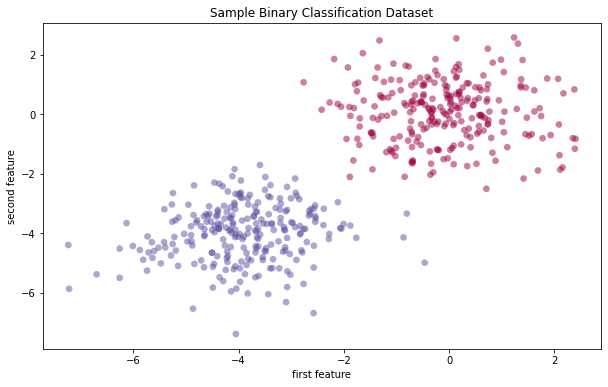

In [75]:
fig = plt.figure(figsize=(10, 6))
axes = plt.axes()
axes.scatter(
    X_train[:, 0],
    X_train[:, 1],
    c=y_train,
    s=45,
    cmap=plt.cm.Spectral,
    alpha=0.5,
    edgecolors='none')
axes.set_xlabel('first feature')
axes.set_ylabel('second feature')
axes.set_title('Sample Binary Classification Dataset')
plt.show()

## Implement Logistic regression model

In [79]:
class LogisticRegression(object):
    
    def __init__(self, num_features, learning_rate):
        self._lr = learning_rate
        self._weights = np.random.randn(num_features)
        self._weights = np.random.randn(num_features + 1)
        
    def forward(self, inp, save_op=True):
        # Add ones along the last dimension
        inp = np.concatenate([inp, np.ones([inp.shape[0], 1])], axis=1)
        
        # Matrix multiply 
        op = np.matmul(inp, self._weights)
        
        # Sigmoid
        op = 1 / (1 + np.exp(-op))
        
        if save_op:
            self.inp_and_op = (inp, op)
        else:
            self.inp_and_op = None
        
        return op
    
    def cost(self, inp, labels):
        op = self.forward(inp, save_op=False)
        loss = np.sum(-np.log(op[labels == 1]))
        loss += np.sum(-np.log(1 - op[labels == 0]))
        
        return loss
        
    
    def update_grad(self, labels):
        x, op = self.inp_and_op[0], self.inp_and_op[1]
        self._grad = np.sum(np.expand_dims((op - labels), axis=-1) * x, axis=0)
        
    def update_weights(self):
        self._weights -= self._lr * self._grad

## Implement training loop

In [80]:
num_iterations = 500
learning_rate = 0.01
num_features = X_train.shape[1]

log_reg = LogisticRegression(num_features, learning_rate)

for i in range(num_iterations):
    log_reg.forward(X_train)
    log_reg.update_grad(y_train)
    log_reg.update_weights()
    
    if i % 25 == 0:
        print (log_reg.cost(X_train, y_train))

148.77016283788362
13.656647754136259
8.882901835315675
6.942933729760825
5.85103793685981
5.136840067681195
4.626845944527712
4.241003057355864
3.9368684368142555
3.6896822858249796
3.4839514931414697
3.3094459175789437
3.1591165314135776
3.0279350877399747
2.912210306486398
2.809165967660145
2.716670398894096
2.6330572674395283
2.5570034675469593
2.4874438464289654


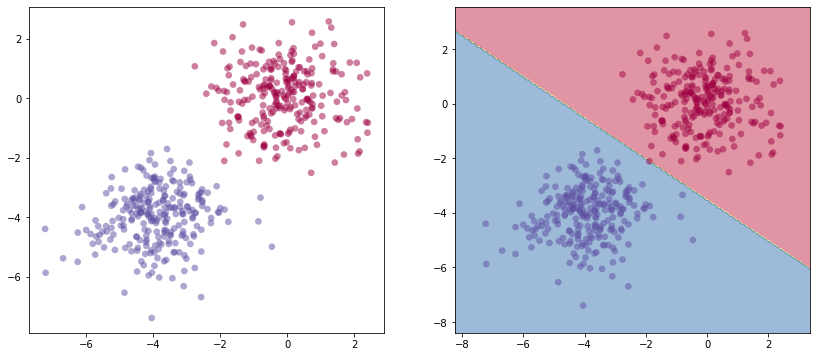

In [81]:
x0_features = np.arange(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 0.05)
x1_features = np.arange(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 0.05)

x0_features, x1_features = np.meshgrid(x0_features, x1_features)

y_pred = log_reg.forward(
    np.column_stack((x0_features.flatten(), x1_features.flatten())))
y_pred = y_pred > 0.5
y_pred = y_pred.reshape(x0_features.shape)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.scatter(
    X_train[:, 0],
    X_train[:, 1],
    c=y_train,
    s=45,
    cmap=plt.cm.Spectral,
    alpha=0.5,
    edgecolors='none')

ax2.contourf(x0_features, x1_features, y_pred, alpha=0.5, cmap=plt.cm.Spectral)
ax2.scatter(
    X_train[:, 0],
    X_train[:, 1],
    c=y_train,
    s=45,
    cmap=plt.cm.Spectral,
    alpha=0.5,
    edgecolors='none')

plt.show()